<a href="https://colab.research.google.com/github/apoorvamohite14/Apoorva-15/blob/main/Mall_Customer_Segmentation_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Mall_Customers[1].csv to Mall_Customers[1].csv


In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv("Mall_Customers[1].csv")

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [ ]:
df.shape

(200, 5)

In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
# df.size

In [ ]:
# df.isnull().sum()

In [ ]:
# (df == 0).any()

In [ ]:
# df.columns =(
#     df.columns
#     .str.strip()
#     .str.lower()
#     .str.replace(r"[()$]","",regex=True)
#     .str.replace("-","_")
#     .str.replace(" ","_")
# )

In [ ]:
# df.columns

In [ ]:
# selecting features

# x = df[["annual_income_k","spending_score_1_100"]]
# x.head()

In [ ]:
# since there is no label , the model can use only is distance between points

In [ ]:
#  visulising raw data

# import matplotlib.pyplot as plt
# plt.figure()
# plt.scatter(x["annual_income_k"],x["spending_score_1_100"])
# plt.xlabel("annual income in $")
# plt.ylabel("spending score (1-100)")
# plt.show()


In [ ]:
# k means tris to group points so that points in the same group are close to each other

# from sklearn.cluster import KMeans

# kmeans = KMeans(n_clusters = 5, random_state=42)
# labels = kmeans.fit_predict(x)

# n_clusters , divide the customer into 5 groups

# fit (x) - looks at all data points in x, place
# 5 random centroids

# assigns each point to center of assigned points in iteration repeats until stable
# for each data point returns which cluster it belongs to represents them with numeric values

In [ ]:
# labels[:10]

In [ ]:
# df["cluster"]=labels
# df.head()

In [ ]:
# visualize clusters

# plt.scatter(
# x["annual_income_k"],
# x["spending_score_1_100"],
# c=labels
# )

# plt.xlabel("annual income in k")
# plt.ylabel("spending score 1-100")
# plt.title("customer segments")
# plt.show()

In [ ]:
# elbow method

# it helps to find how many group to use
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

x = df[["Annual Income (k$)","Spending Score (1-100)"]]

wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k,random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

# wcss-within cluster sum of squares
  # lower wcss-tightly clusters
  # higher wcss-less dense clusters

  # we will store this for each kmeans each loop new model different number of clusters
  #  in each loop k increases , wcss decreases and imporoement slows down after certain point

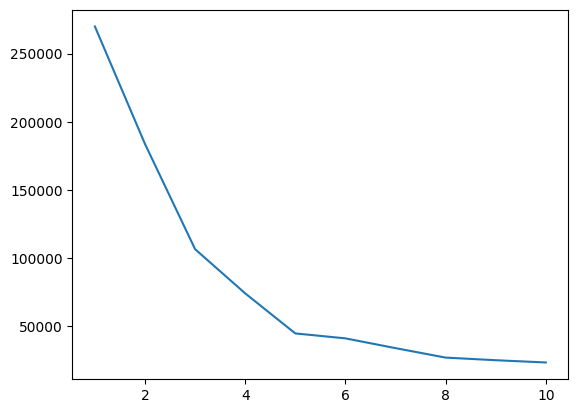

In [ ]:
plt.plot(range(1,11),wcss)

In [ ]:
KMeans=KMeans(n_clusters=5,random_state=42)
label=KMeans.fit_predict(x)

In [ ]:
df["cluster"]=label
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


In [ ]:
label[:10]

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2], dtype=int32)

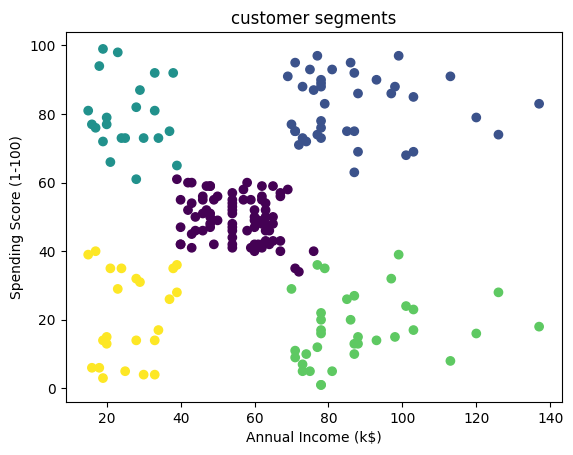

In [ ]:
plt.scatter(x['Annual Income (k$)'],x['Spending Score (1-100)'],c=label)

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('customer segments')
plt.show()

In [ ]:
# applying PCA here

# Principle Comound Analysis - PCA

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x)

# components = 2 - reducing data 2 dimensions,
# information preserved mostly

# PCA are used when data has many feature, so pca compress information then we visualize it pca does not create clusters,
# it helps us seen them

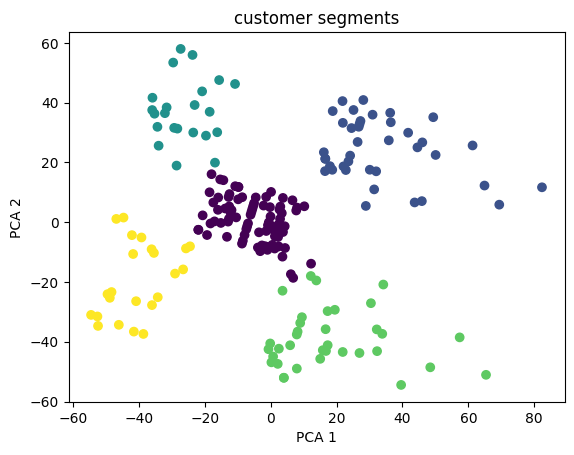

In [ ]:
#visualize cluster using PCA

plt.scatter(
    x_pca[:,0],
    x_pca[:,1],
    c=df['cluster']
)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('customer segments')
plt.show()

In [ ]:
df.groupby('cluster')[['Annual Income (k$)','Spending Score (1-100)']].mean()

,Annual Income (k$),Spending Score (1-100)
cluster,,
0,55.296296,49.518519
1,86.538462,82.128205
2,25.727273,79.363636
3,88.200000,17.114286
4,26.304348,20.913043


In [ ]:
df["segment"]= df["cluster"].map({
    0: "mid income - mid spend",
    1: "high income - high spend",
    2: "low income - low spend",
    3: "high income - high spend",
    4: "low income - low spend"
})

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster,segment
0,1,Male,19,15,39,4,low income - low spend
1,2,Male,21,15,81,2,low income - low spend
2,3,Female,20,16,6,4,low income - low spend
3,4,Female,23,16,77,2,low income - low spend
4,5,Female,31,17,40,4,low income - low spend


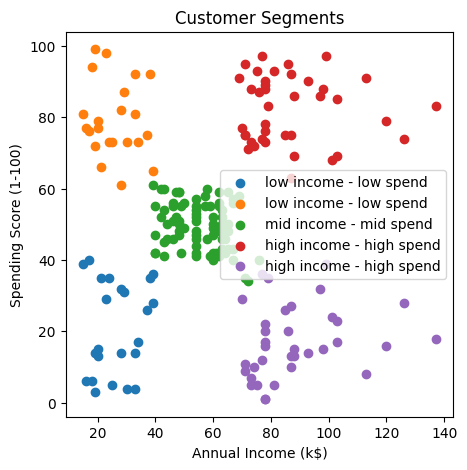

In [ ]:
plt.figure(figsize=(5,5))
for segment_name,cluster_id in df[['segment','cluster']].drop_duplicates().itertuples(index=False):
    subset = df[df['cluster'] == cluster_id]
    plt.scatter(
        subset['Annual Income (k$)'],
        subset['Spending Score (1-100)'],
        label=segment_name
    )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.title('Customer Segments')
plt.show()

In [ ]:
# car - red, yellow, orange, 20k 40k 50k

# car - red yellow orange cost
# car    1   0.     0.     20k
# car    0.  1.     0.     40k
# car    0.  0.     1.     50k